## STAT301 2024W2 Group 26 Project 
</br> *Eaven (23540214), Lucas (53427739), Rahul (25650656), Aryan (93035657)*

2025-04-12 <br>

### Loading of Libraries & Dataset

In [2]:
# Main Developer: Eaven

suppressPackageStartupMessages({
library(haven)    # Loading of .dta, .csv etc. datasets
library(tidyverse)
library(dplyr)
library(datasets)
library(car)
install.packages("vtable")    # maybe needed if not installed
install.packages("corrplot")  # maybe needed if not installed
install.packages("sandwich")  # maybe needed if not installed
install.packages("lmtest")    # maybe needed if not installed
library(vtable)
library(corrplot)
library(sandwich)
library(lmtest)
library(repr)
library(tidymodels)
install.packages("stargazer")      # maybe needed if not installed
library(stargazer)
library(modelr)
library(broom)
library(infer)
library(GGally)
library(leaps)
library(glmnet)
install.packages("poissonreg")
library(poissonreg)
install.packages("caret")      # maybe needed if not installed
library(caret)
install.packages("coefplot")      # maybe needed if not installed
library(coefplot)
})

also installing the dependencies ‘svglite’, ‘kableExtra’, ‘sjlabelled’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘useful’, ‘dygraphs’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
# Main Developer: Eaven

# Read the CSV file with specified column types 
market_data <- as_factor(read_delim("https://raw.githubusercontent.com/DrakenRaptor/STAT301_ProjectGrp26/refs/heads/main/marketing_campaign.csv", delim = "\t"))

# Check the structure of data types 
str(market_data)

head(market_data)
str(market_data$Dt_Customer)


Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [2,240 × 29] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID                 : num [1:2240] 5524 2174 4141 6182 5324 ...
 $ Year_Birth         : num [1:2240] 1957 1954 1965 1984 1981 ...
 $ Education          : chr [1:2240] "Graduation" "Graduation" "Graduation" "Graduation" ...
 $ Marital_Status     : chr [1:2240] "Single" "Single" "Together" "Together" ...
 $ Income             : num [1:2240] 58138 46344 71613 26646 58293 ...
 $ Kidhome            : num [1:2240] 0 1 0 1 1 0 0 1 1 1 ...
 $ Teenhome           : num [1:2240] 0 1 0 0 0 1 1 0 0 1 ...
 $ Dt_Customer        : chr [1:2240] "04-09-2012" "08-03-2014" "21-08-2013" "10-02-2014" ...
 $ Recency            : num [1:2240] 58 38 26 26 94 16 34 32 19 68 ...
 $ MntWines           : num [1:2240] 635 11 426 11 173 520 235 76 14 28 ...
 $ MntFruits          : num [1:2240] 88 1 49 4 43 42 65 10 0 0 ...
 $ MntMeatProducts    : num [1:2240] 546 6 127 20 118 98 164 56 24 6 ...
 $ MntFishProducts    : num [1:2240] 172 2 111 10 46 0 50 3

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


 chr [1:2240] "04-09-2012" "08-03-2014" "21-08-2013" "10-02-2014" ...


## Introduction
Understanding and predicting customer behavior is crucial for companies aiming to boost sales and drag interest. [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) (CPA) is essential in helping a company to understand its customers and tailor their products to fit each customer's preferences. Previous studies has shown that targeted advertisements increases brand searches by 79% (Ayman, 2012). This highlights the importance of CPA in increasing a customer's interest towards the company. Though many past researches has studied on how targeted marketing through CPA affects the customers brand-related web searches, relationship between a customer’s personal data, purchasing habits, and their frequency of web purchases remains underexplored.

This study aims to fill this knowledge deficit by answering the research question:
### <span style="color: red;"> Can we predict a customer's number of web purchases based on their personal data and purchasing habits? </span>
By answering this question, we hope to indentify the dominant factors that influence online purchasing frequencies. Providing valuable influences and an effective model for businesses and companies looking to refine their marketing strategies.

## Data Description

To answer this question, we will be using the Customer Personality Analysis dataset provided by Dr. Omar Romero-Hernandez.
The customer personality analysis is a dataset that links customer's status with their purchase patterns. There are a total of 2240 observations and 28 variables split into 4 groups. **The method of collection was not specified**
- People, the personal data of customer.
- Products, the amount customer spent on a certain type of product in the last 2 years
- Promotion, whether or not customers participated in past promotions/discounts
- Place, where and amount the customer made the purchase

The details of each columns are as followed
| **Variable Name**       | **Type**     | **Description**                                               |
|-------------------------|--------------|---------------------------------------------------------------|
| `ID`                    | Count Data   | Unique identifier for each customer                           |
| `Year_Birth`            | Count Data   | Year of birth of the customer                                 |
| `Education`             | Factor       | Education level of the customer                               |
| `Marital_Status`        | Factor       | Marital status of the customer                                |
| `Income`                | Numeric      | Annual income of the customer                                 |
| `Kidhome`               | Count Data   | Number of children in the customer's household                |
| `Teenhome`              | Count        | Number of teenagers in the customer's household               |
| `Dt_Customer`           | Date\*       | Date of enrollment with the company                           |
| `Recency`               | Count Data   | Days since the last purchase                                  |
| `MntWines`              | Numeric      | Amount spent on wine                                          |
| `MntFruits`             | Numeric      | Amount spent on fruits                                        |
| `MntMeatProducts`       | Numeric      | Amount spent on meat products                                 |
| `MntFishProducts`       | Numeric      | Amount spent on fish products                                 |
| `MntSweetProducts`      | Numeric      | Amount spent on sweet products                                |
| `MntGoldProds`          | Numeric      | Amount spent on gold products                                 |
| `NumDealsPurchases`     | Count Data   | Number of purchases made with a discount                      |
| `NumWebPurchases`       | Count Data   | Number of purchases made through the web                      |
| `NumCatalogPurchases`   | Count Data   | Number of purchases made using a catalog                      |
| `NumStorePurchases`     | Count Data   | Number of purchases made directly in stores                   |
| `NumWebVisitsMonth`     | Count Data   | Number of visits to the company's website in the last month   |
| `AcceptedCmp3`          | Binary       | 1 if the customer accepted the 3rd campaign, 0 otherwise      |
| `AcceptedCmp4`          | Binary       | 1 if the customer accepted the 4th campaign, 0 otherwise      |
| `AcceptedCmp5`          | Binary       | 1 if the customer accepted the 5th campaign, 0 otherwise      |
| `AcceptedCmp1`          | Binary       | 1 if the customer accepted the 1st campaign, 0 otherwise      |
| `AcceptedCmp2`          | Binary       | 1 if the customer accepted the last campaign, 0 otherwise     |
| `Complain`              | Binary       | 1 if the customer has complained in the last 2 years, 0 otherwise |
| `Country`               | Factor       | Country of the customer                                       |


*Given that `Dt_Customer` can be manipulated within the tidyverse library in*
```r 
library(lubridate)
```
*Hence, I have classified it as a `Date` type in the Data Type.* 

**Data Source**: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

The data was provided by Dr. Omar Romero-Hernandez of UC Berkeley. 

## Data Wrangling

The following are the steps taken to clean and prepare our data

1. Dropped 24 rows where na values were found in `Income`.
2. Convert all `2n Cycle` values in `Education` to `Master`, as they are [equivalent](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/discussion/466400).
3. Converted all awkwardly named values in `Marital_Status` to `Single`.
4. Remove the columns `Z_CostContact`, `Z_Revenue` and `ID`, as they do not contribute to our analysis.
5. Converting `Education`, `Marital_Status` and `Dt_Customer` to their appropriate types.
6. Renamed Response to `AcceptedPrevCmp` to avoid confusion.
7. Log-transformed Income to avoid outliers and improve linearity


In [4]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (debugged/collate)

## Step 1
print("Number of NAs by column before cleaning:")
print(colSums(is.na(market_data)))
market_data <- market_data |> filter(!is.na(Income))
print("Number of NAs by column after cleaning:")
print(colSums(is.na(market_data)))

[1] "Number of NAs by column before cleaning:"
                 ID          Year_Birth           Education      Marital_Status 
                  0                   0                   0                   0 
             Income             Kidhome            Teenhome         Dt_Customer 
                 24                   0                   0                   0 
            Recency            MntWines           MntFruits     MntMeatProducts 
                  0                   0                   0                   0 
    MntFishProducts    MntSweetProducts        MntGoldProds   NumDealsPurchases 
                  0                   0                   0                   0 
    NumWebPurchases NumCatalogPurchases   NumStorePurchases   NumWebVisitsMonth 
                  0                   0                   0                   0 
       AcceptedCmp3        AcceptedCmp4        AcceptedCmp5        AcceptedCmp1 
                  0                   0                   0   

In [5]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate)

# Step 2
print("Before:")
print(table(market_data$Education))
market_data <- market_data %>%
    mutate(Education = case_when(
        Education == "2n Cycle" ~ "Master",
        TRUE ~ Education
    ))
print("After:")
print(table(market_data$Education))

[1] "Before:"

  2n Cycle      Basic Graduation     Master        PhD 
       200         54       1116        365        481 
[1] "After:"

     Basic Graduation     Master        PhD 
        54       1116        565        481 


In [6]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate)


# Step 3
print("Before:")
print(table(market_data$Marital_Status))
market_data <- market_data %>%
    mutate(Marital_Status = case_when(
        Marital_Status %in% c("Absurd", "Alone", "YOLO", "Together") ~ "Single",
        TRUE ~ Marital_Status
    ))
print("After:")
print(table(market_data$Marital_Status))

[1] "Before:"

  Absurd    Alone Divorced  Married   Single Together    Widow     YOLO 
       2        3      232      857      471      573       76        2 
[1] "After:"

Divorced  Married   Single    Widow 
     232      857     1051       76 


In [7]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate)

# Step 4
market_data <- market_data %>% 
    select(-Z_CostContact, -Z_Revenue, -ID) 

In [8]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate)

#Step 5
market_data <- market_data |> 
mutate(Education = as.factor(Education), Marital_Status = as.factor(Marital_Status), Dt_Customer = as.Date(Dt_Customer))

In [9]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate)

# Step 6
market_data <- market_data |> rename(AcceptedPrevCmp = Response)
colnames(market_data)

[1] "Year_Birth"          "Education"           "Marital_Status"     
 [4] "Income"              "Kidhome"             "Teenhome"           
 [7] "Dt_Customer"         "Recency"             "MntWines"           
[10] "MntFruits"           "MntMeatProducts"     "MntFishProducts"    
[13] "MntSweetProducts"    "MntGoldProds"        "NumDealsPurchases"  
[16] "NumWebPurchases"     "NumCatalogPurchases" "NumStorePurchases"  
[19] "NumWebVisitsMonth"   "AcceptedCmp3"        "AcceptedCmp4"       
[22] "AcceptedCmp5"        "AcceptedCmp1"        "AcceptedCmp2"       
[25] "Complain"            "AcceptedPrevCmp"

In [10]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate)

# Step 7
# Added 1 to avoid zero values
market_data <- market_data |> mutate(LogIncome = log(Income + 1))
market_data <- market_data |> select(-Income)

In [11]:
# Result
head(market_data)

Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,⋯,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedPrevCmp,LogIncome
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1957,Graduation,Single,0,0,4-09-20,58,635,88,546,⋯,4,7,0,0,0,0,0,0,1,10.97059
1954,Graduation,Single,1,1,8-03-20,38,11,1,6,⋯,2,5,0,0,0,0,0,0,0,10.74387
1965,Graduation,Single,0,0,21-08-20,26,426,49,127,⋯,10,4,0,0,0,0,0,0,0,11.17905
1984,Graduation,Single,1,0,10-02-20,26,11,4,20,⋯,4,6,0,0,0,0,0,0,0,10.19043
1981,PhD,Married,1,0,19-01-20,94,173,43,118,⋯,6,5,0,0,0,0,0,0,0,10.97325
1967,Master,Single,0,1,9-09-20,16,520,42,98,⋯,10,6,0,0,0,0,0,0,0,11.04315


## EDA and Visualisation

### 1. Correlation Plot Between Continuous Random Variables

A correlation plot maybe suitable to check for the relationship between the continuous random variable such as `Income`, `NumCatalogPurchases`, `NumWebVisitsMonth`, `NumStorePurchases`, `NumWebPurchases`. Figure 1 provides a visual summary of the linear relationship betweem the selected variables. This can help us to see which variables can be included in the regression model for analysation which will be done in the Variable Selection section. Additionally, Figure 1 serves as an indicator to check if there's perfect multicolinearity between different variables where an extreme high correlation coefficients (close to -1 or +1) may indicate that.

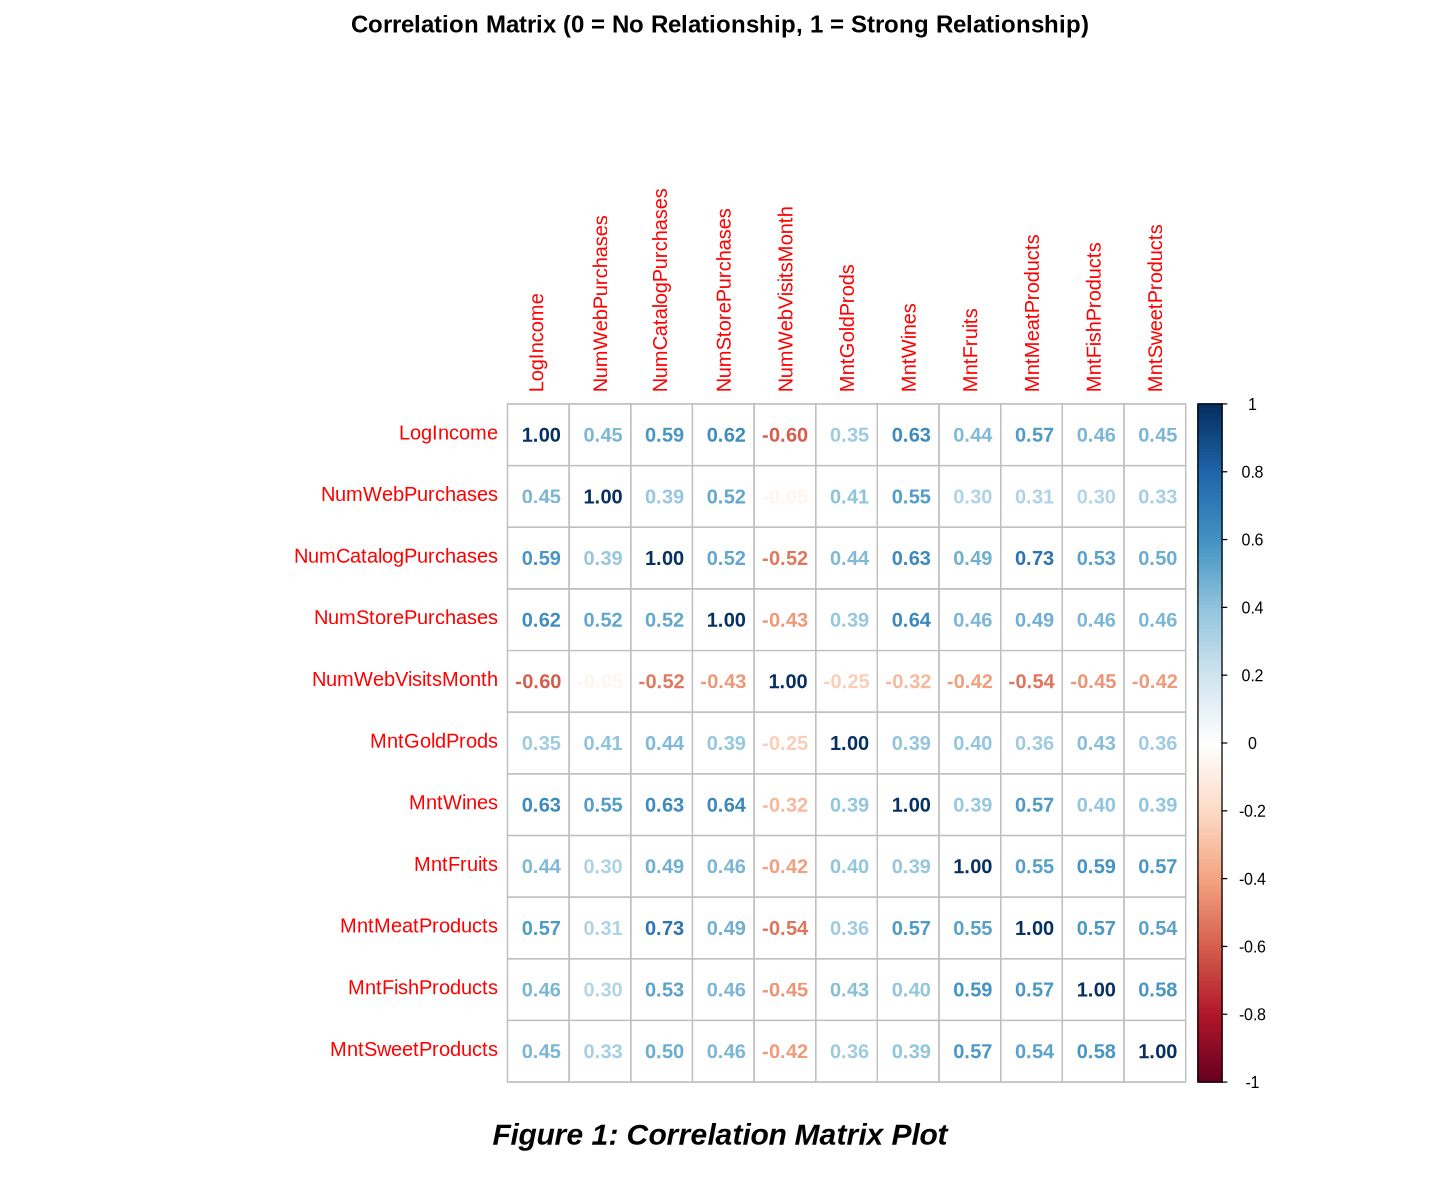

In [12]:
# Main developer: Eaven

options(repr.plot.width = 12, repr.plot.height = 10)
# Using correlation plot to check the relationship between the variables
corr_plt_dat <- market_data[, c("LogIncome", "NumWebPurchases", "NumCatalogPurchases",
 "NumStorePurchases", "NumWebVisitsMonth", "MntGoldProds", "MntWines", "MntFruits", 
 "MntMeatProducts", "MntFishProducts", "MntSweetProducts")] |>
as.data.frame() 
# Ensure there are no missing values
corr_plt_dat <- na.omit(corr_plt_dat)

cor_matrix <- cor(corr_plt_dat)

# Plot the correlation matrix with a title
corrplot(cor_matrix, 
         method = "number", 
         addrect = 2, 
         title = "Correlation Matrix (0 = No Relationship, 1 = Strong Relationship)", 
         mar = c(4, 0, 2, 0))  # Adjust margins to fit the title

# Add "Figure 1" at the bottom of the plot
mtext("Figure 1: Correlation Matrix Plot", side = 1, line = 2, cex = 1.5, font = 4)

From the correlation plot, there seems to be a strong positve relationship between `NumCatalogPurchases` and `MntMeatProducts`. This suggests that the amount of meat products spent is strongly correlated through the `NumCatalogPurchases` which implies that most customers will look through the Catalogue before purchasing meat products. Additionally, there's seems to be a weaker (moderate) relationship between `Income` and `NumWebVisitsMonth` which suggests that there's no relation between these 2 variables.

### 2. Scatterplot of NumWebPurchases vs Income Faceted by Kidhome

Apart from using the Correlation plot above, we can visualise the relationship between `NumWebPurchases` vs `Income` faceted by the presence of kids through a scatterplot.

The scatterplot allows us to visually explore how the demographic factors used in the plot might influence purchasing habits. While there is not much data for PHDs, making the trends in the plot somewhat unclear, we can see that the number of web purchases scales positively with yearly income. In addition, we can see in general income and the number of purchases go down as the number of kids a customer has goes up. 

`geom_smooth()` using formula = 'y ~ x'


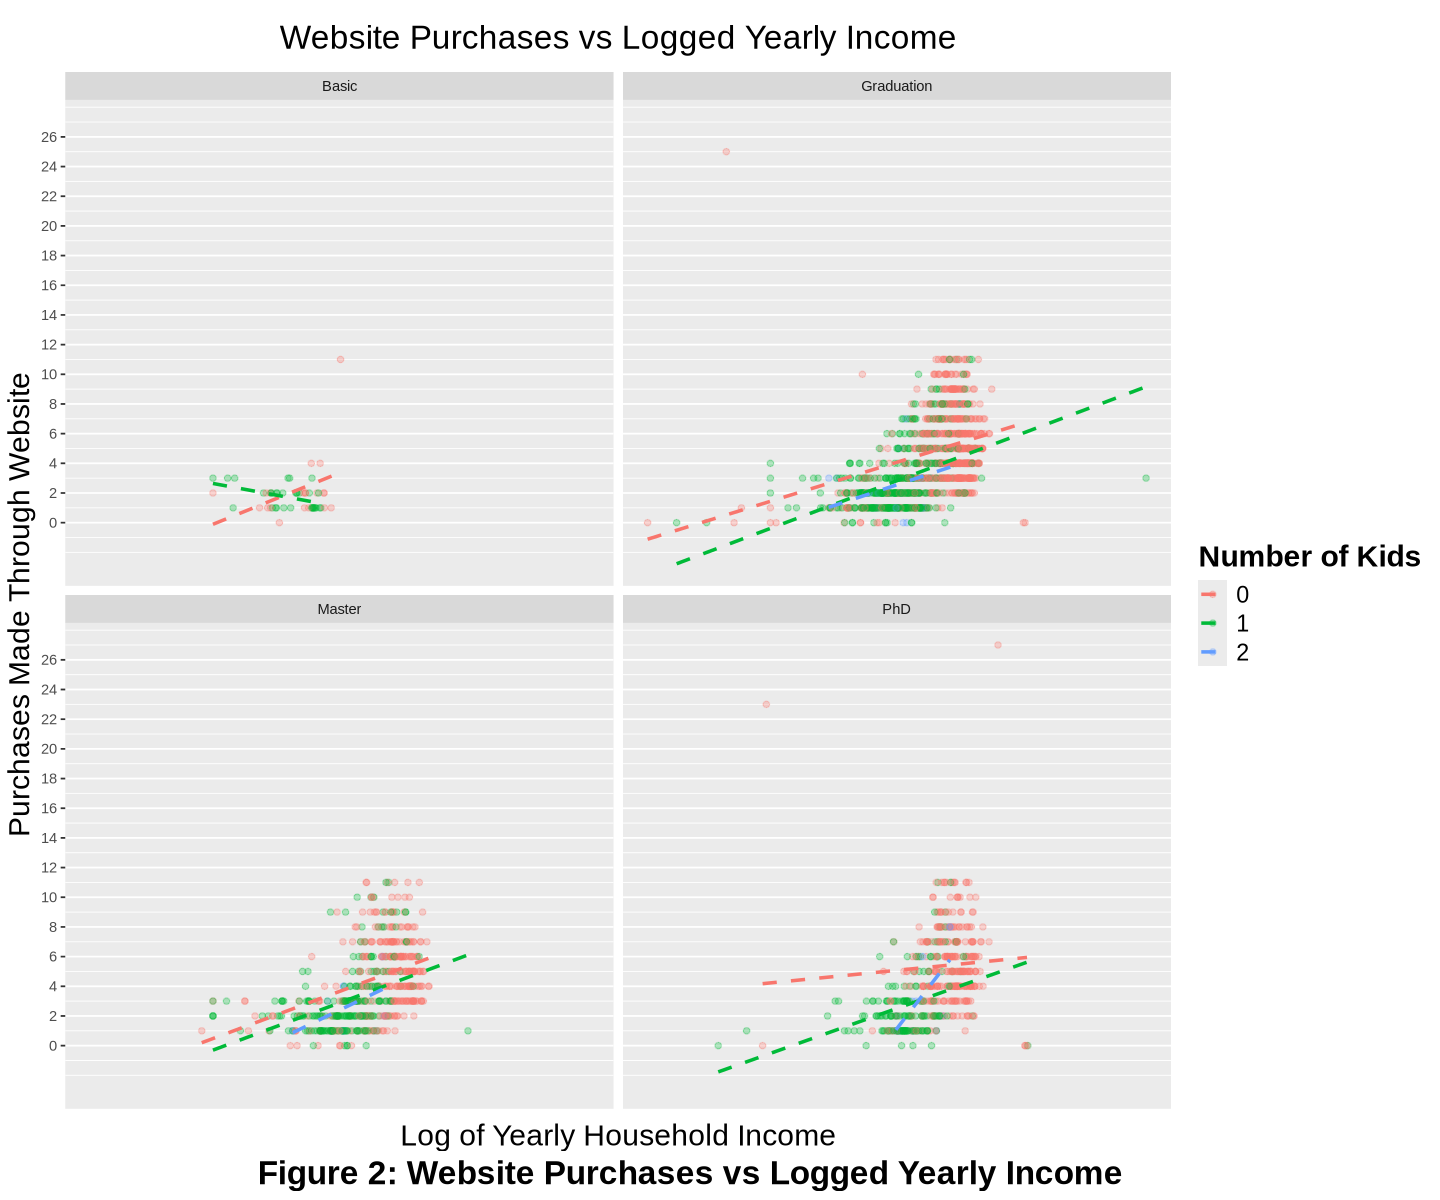

In [13]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate/labelling of plot)

# Creating a Scatterplot of NumWebPurchases vs Income Faceted by Kidhome
p1 <- ggplot(market_data, aes(x = LogIncome, y = NumWebPurchases, color = as.factor(Kidhome))) +
  geom_point(alpha = 0.3, size = 1.5) +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +
  facet_wrap(~ Education, labeller = label_wrap_gen(width = 20)) +
  scale_x_continuous(name = "Log of Yearly Household Income", breaks = seq(5, max(market_data$LogIncome, na.rm = TRUE), by = 10)) +
  scale_y_continuous(name = "Purchases Made Through Website", breaks = seq(0, max(market_data$NumWebPurchases, na.rm = TRUE), by = 2)) +
  xlab("Yearly Household Income") +
  ylab("Purchases Made Through the Company Website") +
  scale_color_discrete(name = "Number of Kids") +  
  ggtitle("Website Purchases vs Logged Yearly Income") + 
  labs(caption = "Figure 2: Website Purchases vs Logged Yearly Income") + 
  theme(
    plot.caption = element_text(hjust = 0.8, size = 20, face = "bold"),
    plot.title = element_text(hjust = 0.5, size = 20, margin = margin(t = 10, b = 10)),  # Center the title
    axis.title.x = element_text(size = 18, margin = margin(t = 10)),  # Increase X-axis font
    axis.title.y = element_text(size = 18),   # Increase Y-axis font
    legend.title = element_text(size = 18, face = "bold"),  # Increase font size of "Number of Kids"
    legend.text = element_text(size = 14) # Increase font size of color labels
  )

# Display the plot
print(p1)

## Methodolgy and Planning

Since `NumWebPurchases` is a type of count, we can use **Poisson Regression** to answer the question, it ensures that our prediction will always be non-negative, and provides direct indication on how each variable affects our target

To use poisson regression, we assume that
- Each observation is independent
- NumDealsPurchases follows a poisson distribution
- NumDealsPurchases is a non-negative integer

Some limitations of poisson regression include poor performance if observations are correlated, and overdispersion when variance is much greater than the mean

#### **The following are the steps we will be following to produce our final model:**
1. Splitting our dataset to training and testing set at a 75:25 ratio
2. Create a full model to assess the improvement of our final model
3. Check and remove multicollinearity within our model
4. Conduct AIC analysis for variable selection
5. Create our final model and assess it's results

## Training/Testing Set Splitting

The rationale for the approach of splitting the data is to optimise the model while keeping the test set entirely separate for final evaulation. This ensures that all performance measures that will be calculated later to reflect the model's ability to generalise to unseen data.

By allocating $25\%$ to the test set, we are able to guarantee that the data is held out and **not** used during the model training or tuning processes. Thus, this reserved subset of testing provides an unbiased estimation of the model's predictive performance on new observations.

In [14]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate/addition of sentence to verify rows & columns)

set.seed(123)
# Split to training and testing
split_data <- initial_split(market_data, prop = 0.75) # , strata = Income

# Create training and testing datasets
training_market <- training(split_data)
testing_market  <- testing(split_data)

# Separate predictors and response for training and testing
market_X_train <- training_market %>% select(-NumWebPurchases)
market_Y_train <- training_market$NumWebPurchases

market_X_test <- testing_market %>% select(-NumWebPurchases)
market_Y_test <- testing_market$NumWebPurchases


cat('\nMarket Training Data has', nrow(market_X_train), 'rows.\n', "and " 
    , ncol(market_X_train), 'columns.\n')

cat('\nMarket Testing data has', nrow(market_X_test), 'rows.\n', "and " 
    , ncol(market_X_test), 'columns.\n')



Market Training Data has 1662 rows.
 and  25 columns.

Market Testing data has 554 rows.
 and  25 columns.


## 2 Full Model

The following code produces a model that uses all predictors

In [15]:
# Main Developer: Lucas
# Contributors: Lucas, Eaven (collate)

# Combine market_X_train with market_Y_train to use glm
model_data <- cbind(market_X_train, NumWebPurchases = market_Y_train)

# Create the Full Poisson regression model
poisson_model <- glm(NumWebPurchases ~ ., data = model_data, family = poisson)
tidy_poisson <- poisson_model %>%     # Tidy Result Data to View Model P-Values                                       
tidy() 

tidy_poisson

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-4.538256e+00,3.510889e+00,-1.29262290,1.961415e-01
Year_Birth,-1.685294e-04,1.127777e-03,-0.14943506,8.812104e-01
EducationGraduation,1.183342e-01,1.276971e-01,0.92667853,3.540935e-01
EducationMaster,1.164514e-01,1.287334e-01,0.90459380,3.656806e-01
EducationPhD,1.712000e-01,1.301631e-01,1.31527280,1.884182e-01
Marital_StatusMarried,4.172359e-02,4.244121e-02,0.98309156,3.255624e-01
Marital_StatusSingle,3.369629e-02,4.181544e-02,0.80583375,4.203387e-01
Marital_StatusWidow,6.756283e-03,7.400068e-02,0.09130028,9.272540e-01
Kidhome,-2.390777e-01,3.397080e-02,-7.03774121,1.953811e-12


## Variable Selection in `market_data`

Regularisation in Generalised Linear Models (GLMs) uses *shrinkage methods* which can be deployed for both logistic and Poisson Regression. Regularisation is used to improve predictive models where some biases are introduced in exchange for the reduction of the model's variance. LASSO and Ridge Regression **may** be used for variable selection. For this project, LASSO regression performs variable selection by ***shrinking*** some coefficients ($\lambda = 0$), which it excludes less important predictors from the model. This will allows us to pick variables that are useful for our analyses. Given that the project are primarilly focus on building a strong predictive models. Hence, this justify the reason for using only LASSO as the only variable selection method instead of incorporating both LASSO and Ridge Regression.

The code below shows the LASSO Regression for Poisson Model.  Ridge regression shrinks all coefficients but all covariates/predictors are still **retained** even covariates with small effects which sets it apart from LASSO.

In [16]:
# Main Developer: Eaven

# Prepare the data
market_X_train <- model.matrix(NumWebPurchases ~ ., data = model_data)[, -1]  # Remove intercept column
market_Y_train <- training_market$NumWebPurchases  # Response variable

# Fit Lasso regression
lasso_model <- cv.glmnet(
  market_X_train, market_Y_train, 
  family = "poisson", 
  alpha = 1,  # Lasso regression
  nfolds = 10  # Cross-validation
)

# Best lambda (penalty parameter) from cross-validation
best_lambda_lasso <- lasso_model$lambda.min
print(paste("Best lambda for Lasso:", best_lambda_lasso))

# Coefficients of the best Lasso model
lasso_coeffs <- coef(lasso_model, s = best_lambda_lasso)
lasso_coeffs

[1] "Best lambda for Lasso: 0.0336896643183978"


30 x 1 sparse Matrix of class "dgCMatrix"
                                 s1
(Intercept)           -3.8676653102
Year_Birth             .           
EducationGraduation    .           
EducationMaster        .           
EducationPhD           0.0353485208
Marital_StatusMarried  .           
Marital_StatusSingle   .           
Marital_StatusWidow    .           
Kidhome               -0.2135599684
Teenhome               0.0371509414
Dt_Customer            .           
Recency                .           
MntWines               0.0003082592
MntFruits              0.0001268567
MntMeatProducts        .           
MntFishProducts        0.0004197738
MntSweetProducts       0.0007728829
MntGoldProds           0.0018273375
NumDealsPurchases      0.0495261375
NumCatalogPurchases    .           
NumStorePurchases      0.0372108885
NumWebVisitsMonth      0.0842812500
AcceptedCmp3           0.0188328132
AcceptedCmp4          -0.0100838638
AcceptedCmp5          -0.0232341257
AcceptedCmp1          

From `lasso_coefs`, `LogIncome` is the strongest postive covariates, which suggests that wealthier customer purchase more online. `KidHome` is a covariates where households with kids (`Kidhome`) tend to buy less, while those with `Teenhome` buy slightly more which implies that households with teenagers are likely to purchase more stuffs such as textbook suppliers, technology (e.g. laptops, mobile phone etc.) Nonetheless, customers who visit the website more (`NumWebVisitsMonth`) are more likely to purchase which is expected, since engagement leads to conversions. 



Spending on different product categories (wine, sweets, fruits, fish, gold products) has a positive correlation with `WebPurchases`, thereby meaning higher spenders in one area may be more inclined to shop online. 
Marketing campaign acceptance has varied effects. Some campaigns increased purchases (`AcceptedCmp3`, `AcceptedPrevCmp`), while others reduced engagement (`AcceptedCmp2`, `AcceptedCmp5`). Thus, this suggests that some promotions may worked better than others.

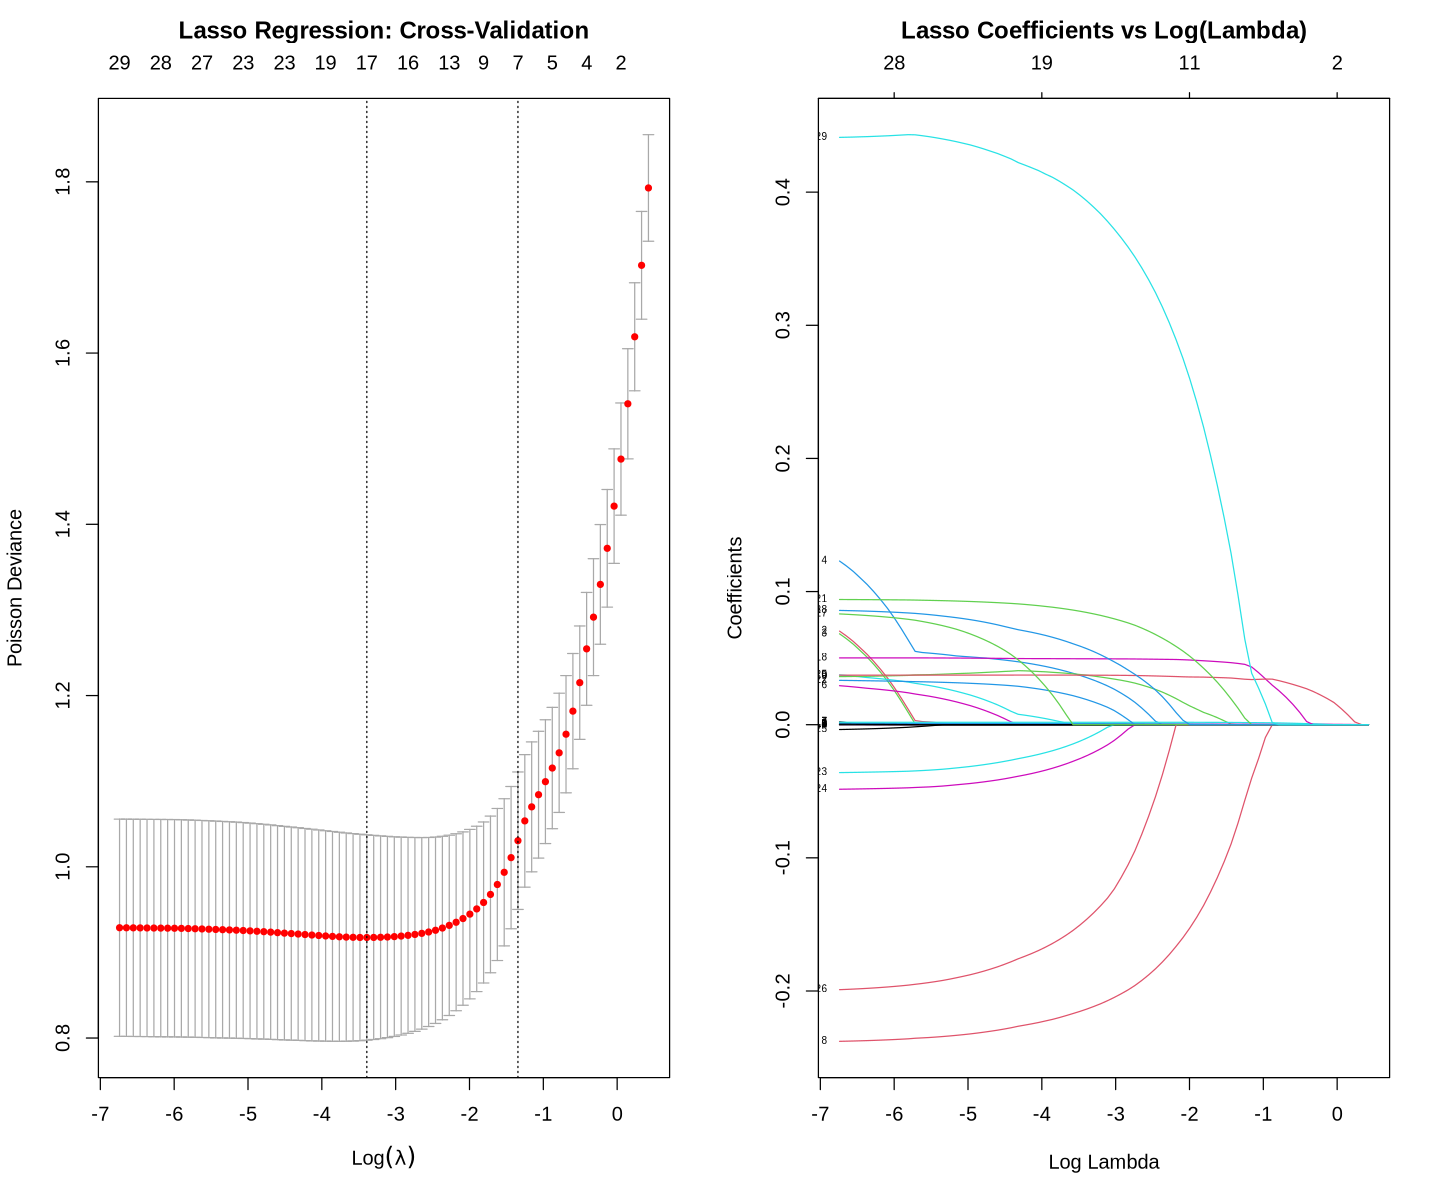

In [17]:
# Main Developer: Eaven

# Set up a plotting layout
par(mfrow = c(1, 2))  # 1 row, 2 columns

# Plot cross-validation results for LASSO
plot(lasso_model)
title("Lasso Regression: Cross-Validation", line = 2.5)

# Plot coefficient shrinkage against log(lambda)
plot(lasso_model$glmnet.fit, xvar = "lambda", label = TRUE)
title("Lasso Coefficients vs Log(Lambda)", line = 2.5)



## Feature Selection with LASSO Regression

Since our focus is on prediction, it is important to avoid overfitting while simultaneously selecting only the most relevant predictors. We employed LASSO regression as the method that not only shrinks coefficient estimates but effectively sets less important coefficients to zero. This built-in variable selection process simplifies the model by excluding predictors/covariates that do not contribute significantly to predicting the outcome.

**Cross-Validation:** A 10-fold cross-validation was implemented using the `cv.glmnet()`function with the `family = "poisson"` argument, as our response variable follows a Poisson distribution. The optimal penalty parameter ($\lambda$) was chosen based on its ability to minimize the cross-validation error, ensuring the best possible bias-variance trade-off. The model outputs the best $\lambda$ and the corresponding coefficients, which indicate the strength and direction of each variable's contribution.

## Overdispersion

One of the assumptions central to the poisson regression is the fact that the variance of the response variable is equal to its mean. If this assumption is not satisfied, and the variance is actually greater than the mean this will result in overdispersion as a result fo which the standard errors of regression coefficients are underestimated. The model might fail to capture the true variability in the data which can potentially cause a bad fit and biased parameter estimates.

Hence, we will now fit a quasipoisson model and check the dispersion parameter to understand whether any overdispersion is occurring. The data used for this fitting will exclude the input variables whose coefficients were reduced to zero in the LASSO cross-validation step.

In [18]:
# Main Developer: Rahul
# Fit a Quasi-Poisson Model with the variables preserved by LASSO cross-validation
poisson_quasi <- glm(
    formula = NumWebPurchases ~ . -Year_Birth -Education -Marital_Status -Dt_Customer -Recency -MntMeatProducts -NumCatalogPurchases -AcceptedCmp1 -Complain,
    data = training_market,
    family = quasipoisson)
summary(poisson_quasi) # View the dispersion parameter




Call:
glm(formula = NumWebPurchases ~ . - Year_Birth - Education - 
    Marital_Status - Dt_Customer - Recency - MntMeatProducts - 
    NumCatalogPurchases - AcceptedCmp1 - Complain, family = quasipoisson, 
    data = training_market)

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -4.490e+00  6.330e-01  -7.093 1.94e-12 ***
Kidhome           -2.341e-01  3.699e-02  -6.330 3.15e-10 ***
Teenhome           4.460e-02  3.151e-02   1.416   0.1571    
MntWines           3.157e-04  6.175e-05   5.112 3.56e-07 ***
MntFruits          1.426e-04  4.079e-04   0.350   0.7267    
MntFishProducts    4.737e-04  3.085e-04   1.535   0.1249    
MntSweetProducts   8.278e-04  3.854e-04   2.148   0.0319 *  
MntGoldProds       1.759e-03  2.679e-04   6.567 6.88e-11 ***
NumDealsPurchases  4.946e-02  7.782e-03   6.356 2.68e-10 ***
NumStorePurchases  3.715e-02  5.786e-03   6.421 1.77e-10 ***
NumWebVisitsMonth  9.424e-02  8.876e-03  10.617  < 2e-16 ***
AcceptedCmp3     

As we can see, the value of the dispersion parameter is 1.275245. While this does indicate slight overdispersion it is not severe and as such we can still use the regular poisson regression model.

## Final Model

Since we have seen in the previous step that the overdispersion is not severe enough to deter us from using the poisson regression model, here we are fitting the final poisson regression model using the input variables suggested by Lasso.

In [21]:
# Main Developer: Aryan
#fitting the final poisson model using the covariates suggested by the LASSO method performed previously.
poisson_final <- glm(
    formula = NumWebPurchases ~ . -Year_Birth -Education -Marital_Status -Dt_Customer -Recency -MntMeatProducts -NumCatalogPurchases -AcceptedCmp1 -Complain,
    data = training_market,
    family = poisson) 

tidy(poisson_model)
#extracts and displays the model’s coefficients, standard errors, and significance levels in a readable format. 

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-4.538256e+00,3.510889e+00,-1.29262290,1.961415e-01
Year_Birth,-1.685294e-04,1.127777e-03,-0.14943506,8.812104e-01
EducationGraduation,1.183342e-01,1.276971e-01,0.92667853,3.540935e-01
EducationMaster,1.164514e-01,1.287334e-01,0.90459380,3.656806e-01
EducationPhD,1.712000e-01,1.301631e-01,1.31527280,1.884182e-01
Marital_StatusMarried,4.172359e-02,4.244121e-02,0.98309156,3.255624e-01
Marital_StatusSingle,3.369629e-02,4.181544e-02,0.80583375,4.203387e-01
Marital_StatusWidow,6.756283e-03,7.400068e-02,0.09130028,9.272540e-01
Kidhome,-2.390777e-01,3.397080e-02,-7.03774121,1.953811e-12


In [22]:
### DO NOT DELETE THIS PART !!! MAY USE IT IN THE SUMMARY TO PRESENT THE RESULTS AND FINDINGS

stargazer_res <- stargazer(poisson_model, poisson_quasi, poisson_final,
                           title = "Comparison of Multiple Regression Results",
                           align = TRUE, type="text", keep =  c(), # Specify predictors to keep 
                           digits = 9, keep.stat = c("n","rsq", "aic", "bic"))


Comparison of Multiple Regression Results
                                     Dependent variable:               
                      -------------------------------------------------
                                       NumWebPurchases                 
                          Poisson     glm: quasipoisson     Poisson    
                                         link = log                    
                            (1)              (2)              (3)      
-----------------------------------------------------------------------
Year_Birth             -0.000168529                                    
                       (0.001127777)                                   
                                                                       
EducationGraduation     0.118334200                                    
                       (0.127697100)                                   
                                                                       
EducationMaster      

### Discussion

From `stargazer_res`, the comparison between `reg1` and `reg2` highlights the importance of robust standard errors in Poisson regression. While the coefficient estimates remain the same, the adjusted standard errors in `reg2` provide more reliable inference, especially when the equidispersion assumption is violated. For robust and accurate conclusions, the results from `reg2` should be preferred. Thus, this suggests that **heteroskedasticity** or violations of the equidispersion assumption (Variance $\neq$ Mean) are not **significantly affecting** the standard errors in this case. The robust standard errors (`robust_se_tibble`) and hypothesis tests (`reg2`) account for potential violations of the Poisson regression assumptions, providing more reliable inference. These results help identify key predictors/covariates of `NumWebPurchases`.

### References

1. Lehmann, Johannes, and Michael Beckmann. 2025. “Digital Technologies and Performance Incentives: Evidence from Businesses in the Swiss Economy.” Swiss Journal of Economics and Statistics 161 (1): 1. https://doi.org/10.1186/s41937-024-00132-3.

2. Farahat, A., & Bailey, M. C. (2012). How effective is targeted advertising? Proceedings of the 21st International Conference on World Wide Web. https://doi.org/10.1145/2187836.2187852